# Financial Fraud Detection  
## Exploratory Data Analysis (EDA) using Python

This notebook presents an exploratory analysis of credit card transaction data
to identify patterns and indicators associated with fraudulent behavior.

## Business Objective

The objective of this analysis is to explore transaction data to:
- Understand data structure and quality
- Identify behavioral differences between fraudulent and legitimate transactions
- Highlight key risk indicators relevant for fraud detection systems

## EDA Approach

The analysis follows a structured approach:
1. Dataset overview and dimensions
2. Categorical variable analysis
3. Numerical variable distribution
4. Data quality checks
5. Fraud vs non-fraud comparison
6. Segment and temporal analysis
7. Key fraud indicators

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("D:\Simplilearn\Capstone Project\Financial_Fraud_Detection_Datasets\cc_data.csv")

## Dataset Dimensions

**Objective:**  
To understand the scale of the dataset in terms of transactions and attributes.

In [148]:
df.shape

(389002, 23)

In [149]:
df.columns

Index(['index', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

**Observation:**  
The dataset contains 389,002 rows and 23 columns.

**Interpretation:**  
Each row represents a credit card transaction, and the dataset size is sufficient
for identifying fraud patterns and anomalies.


In [150]:
df.dtypes

index                      int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## Categorical Variable Analysis

**Objective:**  
To examine categorical variables and identify high- and low-cardinality features.

In [151]:
categorical_cols = df.select_dtypes(include = 'object').columns

In [152]:
categorical_cols

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [153]:
df[categorical_cols].describe()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,389002,389002,389002,389002,389002,389002,389002,389002,389002,389002,389002,389002
unique,293627,693,14,352,481,2,979,890,51,492,964,389002
top,22-12-2019 18:12,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,1652 James Mews,Birmingham,TX,Film/video editor,23-03-1977,ff66e2310bf7a2a05e65d6b0a363aa5b
freq,8,1305,39633,7982,8511,213231,980,1740,28482,2945,1694,1


In [154]:
df[categorical_cols].nunique()

trans_date_trans_time    293627
merchant                    693
category                     14
first                       352
last                        481
gender                        2
street                      979
city                        890
state                        51
job                         492
dob                         964
trans_num                389002
dtype: int64

**Key Observations:**  
- Variables such as gender and category have limited unique values  
- Merchant and job columns show high cardinality

## Numerical Variable Distribution

**Objective:**  
To understand transaction amount and city population behavior.

In [157]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['index', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [158]:
df[num_cols].describe()

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000,389002.000000,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000
mean,6.485205e+05,4.191512e+17,70.442148,48818.064295,38.533121,-90.237664,8.868084e+04,1.349251e+09,38.531683,-90.236674,0.005789
std,3.745744e+05,1.311579e+18,162.203915,26879.383224,5.074596,13.745855,3.012101e+05,1.285085e+07,5.109400,13.757311,0.075866
min,1.100000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.669638,0.000000
25%,3.241842e+05,1.800429e+14,9.660000,26237.000000,34.620500,-96.798000,7.430000e+02,1.338751e+09,34.719394,-96.905445,0.000000
50%,6.486485e+05,3.521417e+15,47.570000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349267e+09,39.361065,-87.446843,0.000000
75%,9.735032e+05,4.642255e+15,83.077500,72011.000000,41.940400,-80.158000,2.032800e+04,1.359460e+09,41.956012,-80.253831,0.000000
max,1.296674e+06,4.992346e+18,27390.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.064277,-66.956540,1.000000


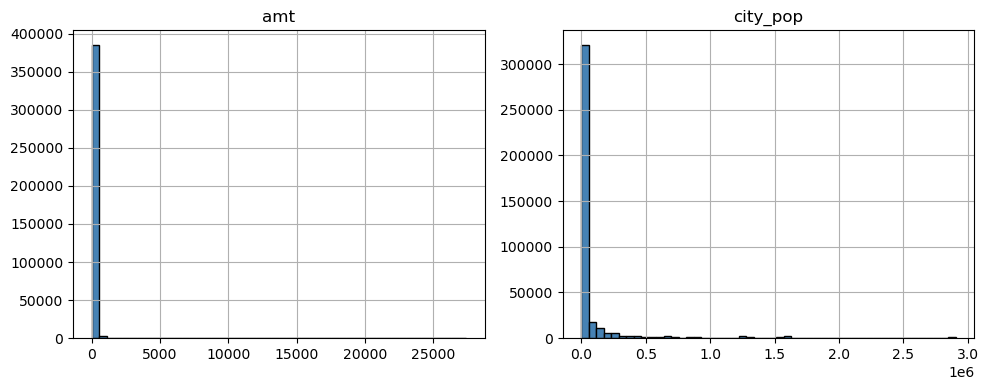

In [159]:
df[["amt", "city_pop"]].hist(bins=50, figsize=(10,4),color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

**Key Observations:**  
- Transaction amounts are right-skewed  
- City population shows extreme values due to large cities  


## 4. Missing Values Analysis

**Objective:**  
To assess data completeness and identify missing values.

In [64]:
df.isnull().sum()

index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [65]:
df.isnull().sum().sum()

np.int64(0)

In [66]:
(df.isnull().sum() / len(df)) * 100

index                    0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

**Key Observations:**  
- A thorough check of the dataset revealed zero missing values 

## 5. Summary Statistics of Numerical Variables

**Objective:**  
To analyze central tendency, spread, and extreme values.

In [161]:
df[num_cols].describe()

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000,389002.000000,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000
mean,6.485205e+05,4.191512e+17,70.442148,48818.064295,38.533121,-90.237664,8.868084e+04,1.349251e+09,38.531683,-90.236674,0.005789
std,3.745744e+05,1.311579e+18,162.203915,26879.383224,5.074596,13.745855,3.012101e+05,1.285085e+07,5.109400,13.757311,0.075866
min,1.100000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.669638,0.000000
25%,3.241842e+05,1.800429e+14,9.660000,26237.000000,34.620500,-96.798000,7.430000e+02,1.338751e+09,34.719394,-96.905445,0.000000
50%,6.486485e+05,3.521417e+15,47.570000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349267e+09,39.361065,-87.446843,0.000000
75%,9.735032e+05,4.642255e+15,83.077500,72011.000000,41.940400,-80.158000,2.032800e+04,1.359460e+09,41.956012,-80.253831,0.000000
max,1.296674e+06,4.992346e+18,27390.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.064277,-66.956540,1.000000


In [162]:
df[num_cols]['amt'].median()

47.57

**Key Observations:**  
- **Mean** transaction amount (**amt**) is higher than the **Median**
- The mean **($70.45$)** notably exceeds the median ($47.57$), confirming a positively (right) skewed distribution. 

## 6. Correlation Analysis

**Objective:**  
To examine relationships between numerical variables.

In [163]:
df[num_cols].corr()

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
index,1.000000,0.001289,0.000779,0.000874,-0.000193,-0.001494,-0.001800,0.998976,-0.000383,-0.001475,-0.006121
cc_num,0.001289,1.000000,0.002975,0.040486,-0.059182,-0.047587,-0.009125,0.001333,-0.058560,-0.047549,-0.001280
amt,0.000779,0.002975,1.000000,0.001756,-0.000445,-0.000517,0.007271,0.000780,-0.000314,-0.000578,0.210706
zip,0.000874,0.040486,0.001756,1.000000,-0.112567,-0.910295,0.078373,0.000905,-0.111689,-0.909470,-0.001220
lat,-0.000193,-0.059182,-0.000445,-0.112567,1.000000,-0.016080,-0.155972,-0.000150,0.993599,-0.015994,0.002643
long,-0.001494,-0.047587,-0.000517,-0.910295,-0.016080,1.000000,-0.053461,-0.001608,-0.016010,0.999119,0.001376
city_pop,-0.001800,-0.009125,0.007271,0.078373,-0.155972,-0.053461,1.000000,-0.001766,-0.154767,-0.053468,0.001176
unix_time,0.998976,0.001333,0.000780,0.000905,-0.000150,-0.001608,-0.001766,1.000000,-0.000354,-0.001582,-0.006562
merch_lat,-0.000383,-0.058560,-0.000314,-0.111689,0.993599,-0.016010,-0.154767,-0.000354,1.000000,-0.015932,0.002406
merch_long,-0.001475,-0.047549,-0.000578,-0.909470,-0.015994,0.999119,-0.053468,-0.001582,-0.015932,1.000000,0.001351


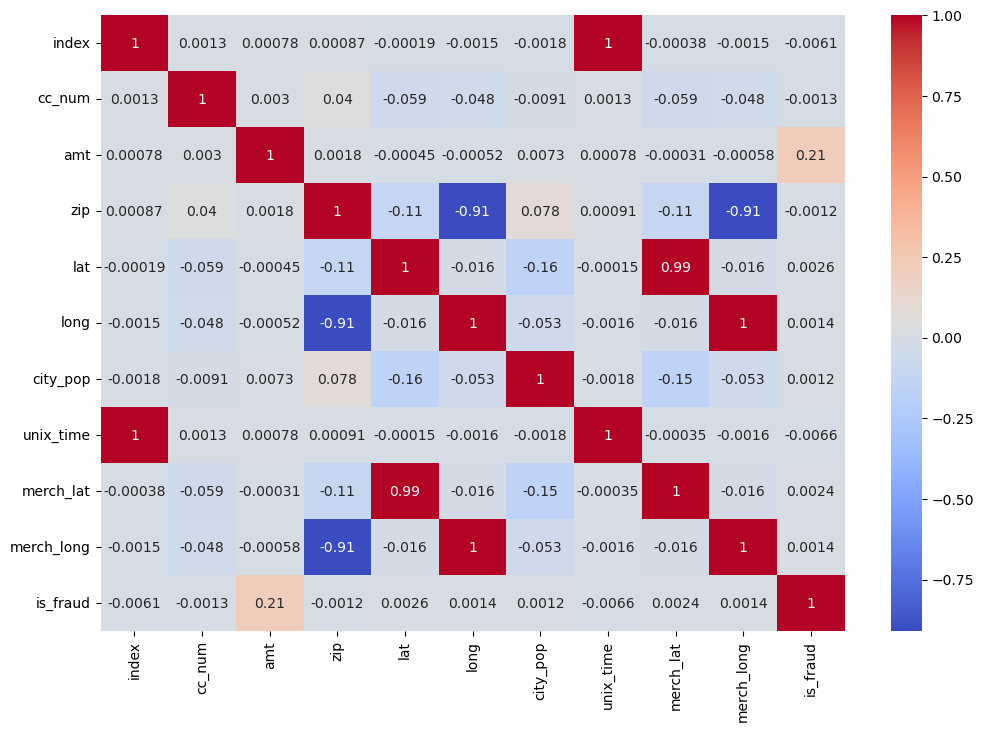

In [164]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

**Key Observations:**  

- The transaction amount **(amt)** exhibits the strongest positive correlation with is_fraud ($0.21$). This confirms that as transaction value increases, the likelihood of fraud also rises.

## 7. Fraud vs Non-Fraud Transaction Analysis

**Objective:**  
To compare transaction behavior between fraudulent and legitimate transactions.

In [165]:
df["is_fraud"].value_counts()

is_fraud
0    386750
1      2252
Name: count, dtype: int64

In [166]:
df.groupby("is_fraud")["amt"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,386750.0,67.834157,156.227752,1.00,9.6200,47.330,82.5000,27390.12
1,2252.0,518.328677,389.127281,1.18,147.8825,365.285,888.3425,1294.83


<Figure size 600x400 with 0 Axes>

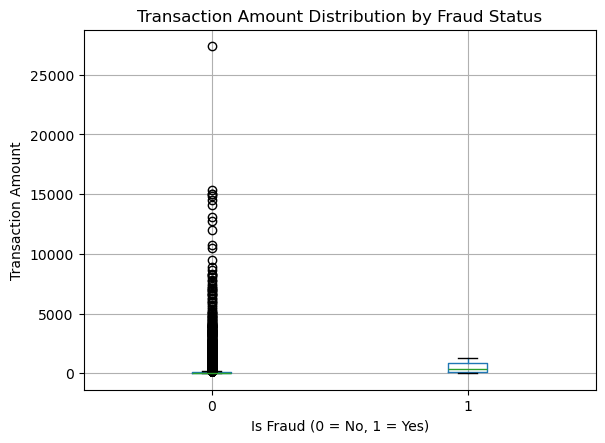

In [102]:
plt.figure(figsize=(6,4))
df.boxplot(column="amt", by="is_fraud")
plt.title("Transaction Amount Distribution by Fraud Status")
plt.suptitle("")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.show()

**Key Observations:**  

- Higher transaction amounts are significantly correlated with increased fraud risk

## 8. Outlier Analysis

**Objective:**  
To identify and assess extreme values in numerical variables.

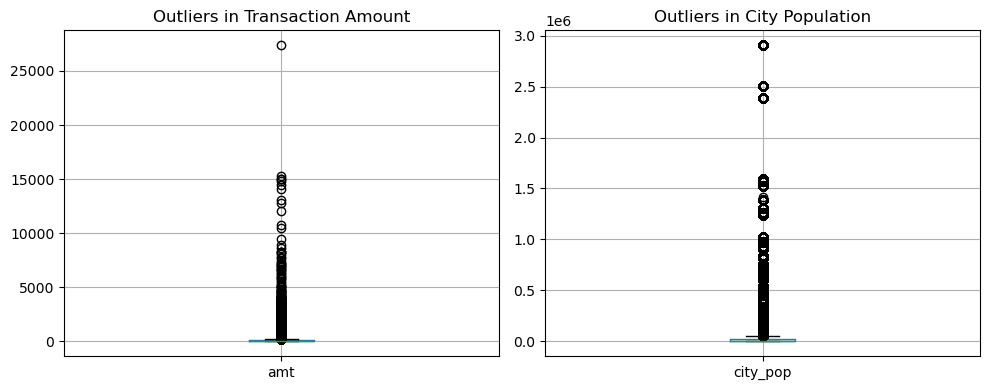

In [171]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df.boxplot(column="amt")
plt.title("Outliers in Transaction Amount")

plt.subplot(1,2,2)
df.boxplot(column="city_pop")
plt.title("Outliers in City Population")

plt.tight_layout()
plt.show()


**Key Observations:**  

- Boxplot analysis confirms the presence of outliers in both transaction amount (amt) and city population (city_pop).

## 9. Time-Based Trend Analysis

**Objective:**  
To identify temporal patterns in transaction behavior.

In [179]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], dayfirst=True)

In [180]:
df["month"] = df["trans_date_trans_time"].dt.to_period("M")

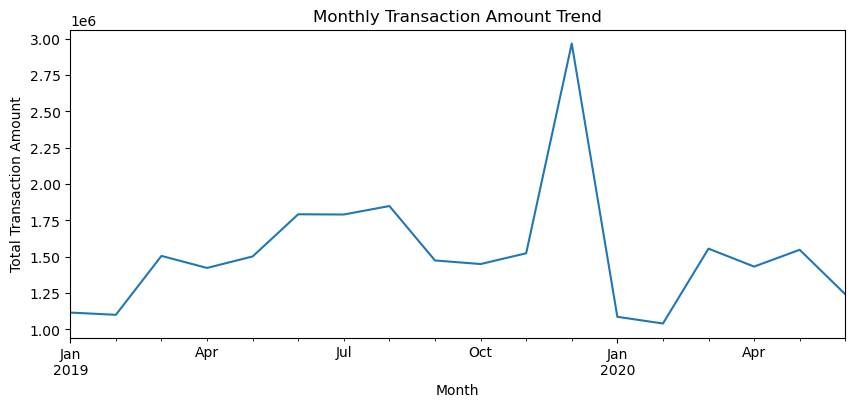

In [181]:
monthly_trend = df.groupby("month")["amt"].sum()

plt.figure(figsize=(10,4))
monthly_trend.plot()
plt.title("Monthly Transaction Amount Trend")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.show()

**Key Observations:**

- The "Monthly Transaction Amount Trend" highlights a massive surge in total transaction volume around December 2019, reaching nearly $3,000,000$.

## 10. Fraud Distribution Across Categories

**Objective:**  
To identify transaction categories with higher fraud occurrence.

In [197]:
fraud_by_category = df.groupby("category")["is_fraud"].sum()
fraud_by_category.sort_values(ascending=False).head(10)

category
grocery_pos      518
shopping_net     478
misc_net         287
shopping_pos     253
gas_transport    193
misc_pos          77
personal_care     76
kids_pets         74
entertainment     68
home              65
Name: is_fraud, dtype: int64

In [198]:
fraud_rate_category = df.groupby("category")["is_fraud"].mean()
fraud_rate_category.sort_values(ascending=False).head(10)

category
shopping_net     0.016317
misc_net         0.015017
grocery_pos      0.014090
shopping_pos     0.007226
gas_transport    0.004870
travel           0.003445
misc_pos         0.003202
grocery_net      0.002889
personal_care    0.002776
entertainment    0.002418
Name: is_fraud, dtype: float64

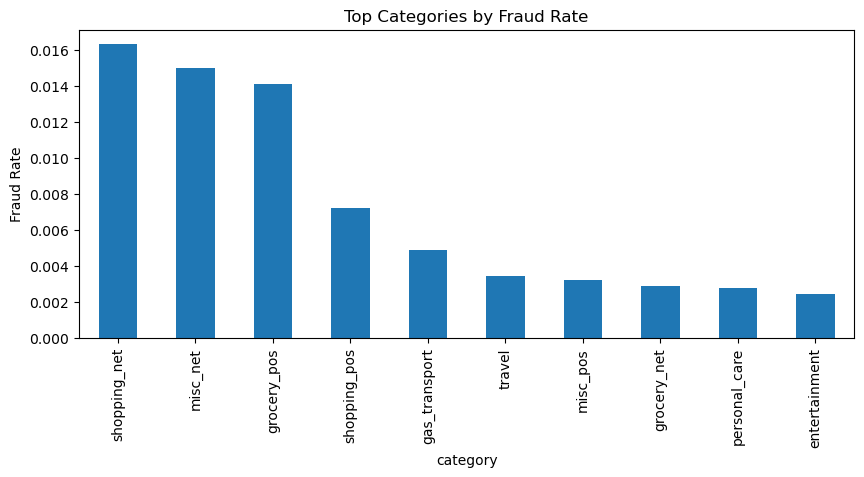

In [201]:
plt.figure(figsize=(10,4))
fraud_rate_category.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top Categories by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.show()

**Key Observations:**  
- Shopping_net (1.62%) and misc_net (1.50%) have the highest fraud rates


## 11. Unusual or Unexpected Values

**Objective:**  
To identify values that violate business or logical rules.

In [205]:
df[df["amt"] <= 0].shape

(0, 24)

In [206]:
df["city_pop"].describe()

count    3.890020e+05
mean     8.868084e+04
std      3.012101e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

In [207]:
df["is_fraud"].unique()

array([0, 1])

**Key Observations:**  
- No negative or invalid values detected  

## 12. Data Consistency Checks

**Objective:**  
To detect duplicates or formatting inconsistencies.

In [217]:
df.isnull().sum()

index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
month                    0
dtype: int64

In [218]:
df[['amt', 'city_pop']].describe()

,amt,city_pop
count,389002.000000,3.890020e+05
mean,70.442148,8.868084e+04
std,162.203915,3.012101e+05
min,1.000000,2.300000e+01
25%,9.660000,7.430000e+02
50%,47.570000,2.456000e+03
75%,83.077500,2.032800e+04
max,27390.120000,2.906700e+06


In [219]:
df['gender'].unique()
df['category'].nunique()

14

In [220]:
df['trans_date_trans_time'].min()
df['trans_date_trans_time'].max()

Timestamp('2020-06-21 12:13:00')

In [209]:
df.duplicated().sum()

np.int64(0)

In [210]:
df["trans_num"].duplicated().sum()

np.int64(0)

In [137]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [139]:
df[categorical_cols].apply(
    lambda x: x.astype(str).str.strip().nunique()
)

merchant        693
category         14
first           352
last            481
gender            2
street          979
city            890
state            51
job             492
dob             964
trans_num    389002
dtype: int64

**Key Observations:**  
- No duplicate transactions found  

## 13. Segment-Based Distribution Analysis

**Objective:**  
To analyze transaction behavior across different segments.

In [140]:
df.groupby("is_fraud")["amt"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,386750.0,67.834157,156.227752,1.00,9.6200,47.330,82.5000,27390.12
1,2252.0,518.328677,389.127281,1.18,147.8825,365.285,888.3425,1294.83


In [141]:
df.groupby("category")["amt"].median().sort_values(ascending=False).head(10)

category
grocery_pos       105.580
gas_transport      62.750
entertainment      50.910
grocery_net        50.900
home               48.650
kids_pets          47.160
health_fitness     42.805
food_dining        42.565
personal_care      32.770
misc_pos           13.475
Name: amt, dtype: float64

In [142]:
df.groupby("gender")["amt"].median()

gender
F    43.37
M    51.82
Name: amt, dtype: float64


**Key Observations:**  
- Behavioral differences exist across segments  

## 14. Key Factors Influencing Fraud

**Objective:**  
To identify variables most associated with fraudulent behavior.

In [223]:
df[['amt', 'is_fraud']].corr()

,amt,is_fraud
amt,1.000000,0.210706
is_fraud,0.210706,1.000000


In [225]:
df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

category
shopping_net      0.016317
misc_net          0.015017
grocery_pos       0.014090
shopping_pos      0.007226
gas_transport     0.004870
travel            0.003445
misc_pos          0.003202
grocery_net       0.002889
personal_care     0.002776
entertainment     0.002418
kids_pets         0.002182
home              0.001762
food_dining       0.001552
health_fitness    0.001516
Name: is_fraud, dtype: float64

In [228]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df.groupby('hour')['is_fraud'].mean().sort_values

<bound method Series.sort_values of hour
0     0.016370
1     0.016533
2     0.013281
3     0.014915
4     0.001044
5     0.001096
6     0.000951
7     0.001448
8     0.000861
9     0.001349
10    0.000548
11    0.001101
12    0.000917
13    0.001183
14    0.001546
15    0.000965
16    0.001415
17    0.000871
18    0.001053
19    0.001220
20    0.000670
21    0.000971
22    0.029498
23    0.027388
Name: is_fraud, dtype: float64>

In [229]:
df.groupby("is_fraud")[["amt", "city_pop"]].median()

,amt,city_pop
is_fraud,,
0,47.330,2456.0
1,365.285,2449.5


**Key Factors Identified:**  
- Based on exploratory data analysis, higher transaction amounts, specific merchant categories, certain time periods, and transactions occurring in densely populated cities appear to be key factors associated with fraudulent activity  

## 15. EDA Summary and Conclusion

This exploratory data analysis identified key behavioral differences between
fraudulent and legitimate transactions. Transaction amount, category, and
temporal patterns emerged as important indicators of fraud risk. The dataset
is clean, well-structured, and suitable for further modeling or real-time
fraud detection applications.